## Importing the Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline


### Load the data

## Data Description

#### The data set contains the following columns:

> * **Avg. Area Income**: Avg. Income of residents of the city house is located in.

> * **Avg. Area House Age**: Avg Age of Houses in same city

> * **Avg. Area Number of Rooms**: Avg Number of Rooms for Houses in same city

> * **Avg. Area Number of Bedrooms**: Avg Number of Bedrooms

> * **Area Population**: Population of city house is located in

> * **Price**: Price that the house sold at

> * **Address**: Address for the house


In [28]:
df = pd.read_csv(r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\USA_Housing.csv")

In [29]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [30]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


> #### There is no null value in the dataset.

# EDA

In [32]:
# Dropping the columns which are not required

df.drop(["Address"], axis=1, inplace=True)

### Cheking Outliers using Boxplot and Removing them

In [33]:
df.shape


(5000, 6)

Avg. Area Income


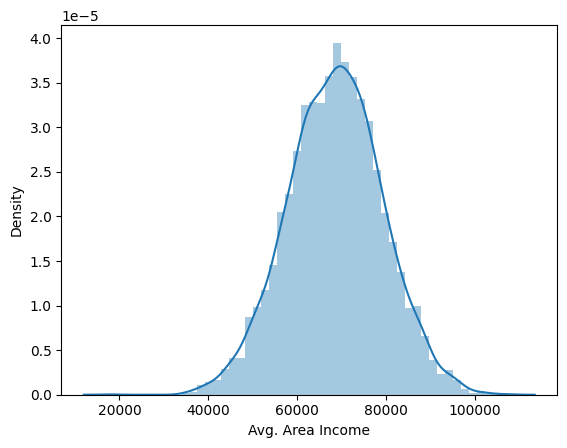

Avg. Area House Age


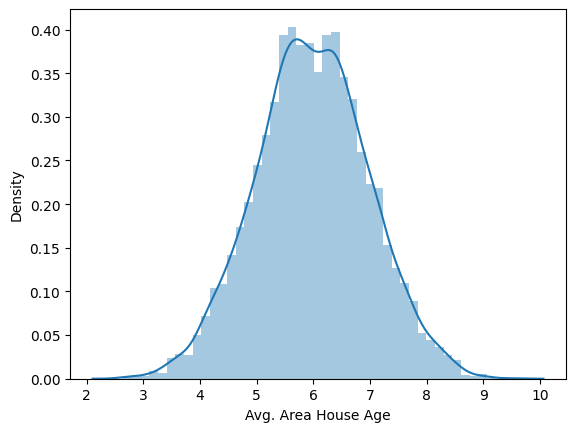

Avg. Area Number of Rooms


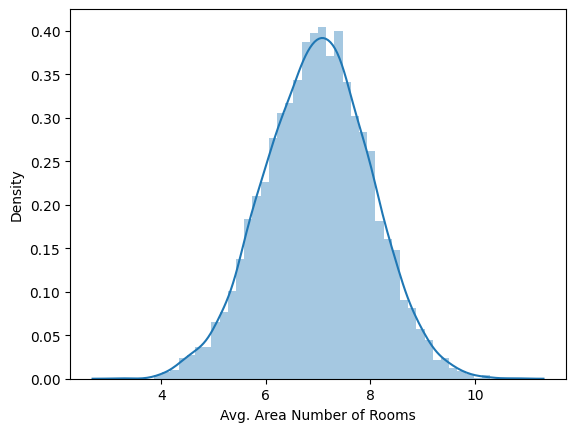

Avg. Area Number of Bedrooms


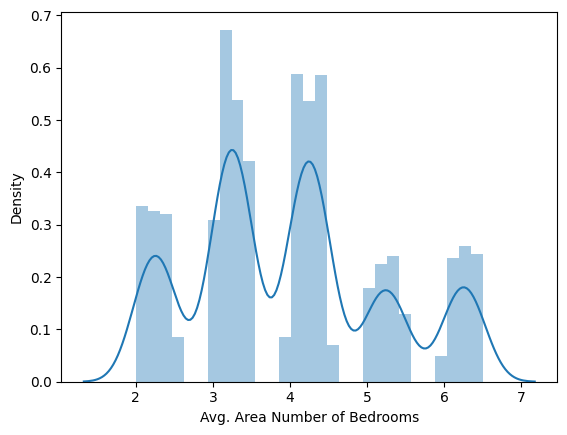

Area Population


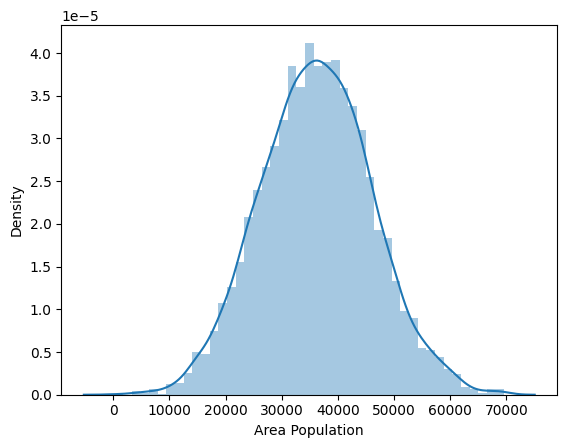

Price


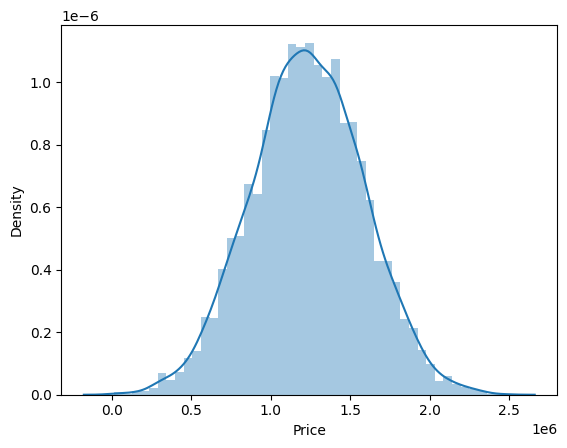

In [34]:
for i in df.columns:
    print(i)
    sns.distplot(df[i])
    plt.show()

Avg. Area Income


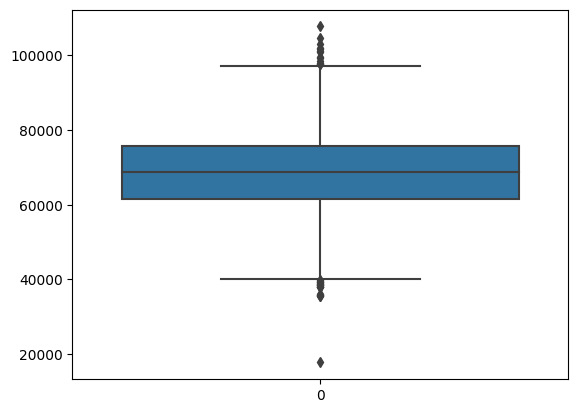

Avg. Area House Age


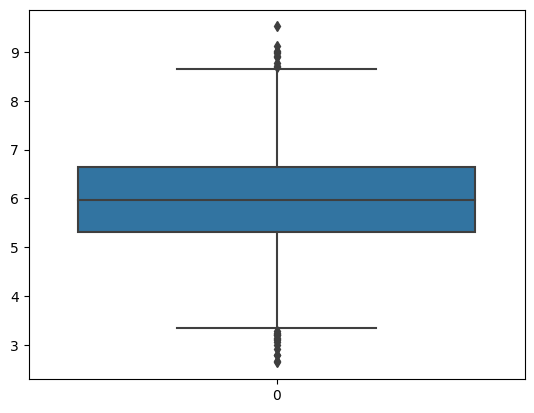

Avg. Area Number of Rooms


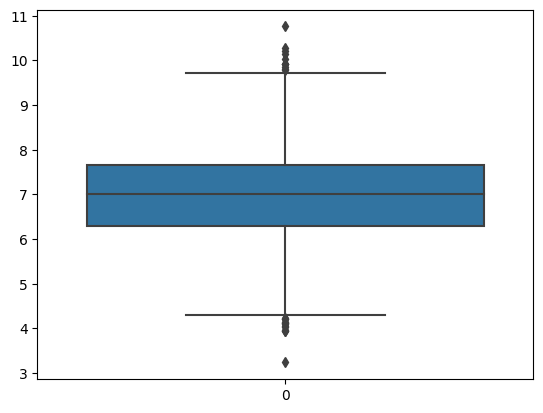

Avg. Area Number of Bedrooms


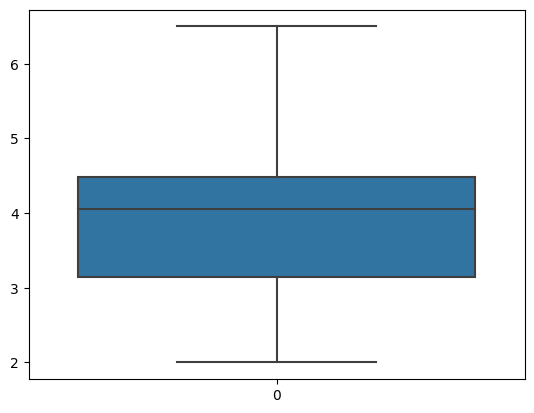

Area Population


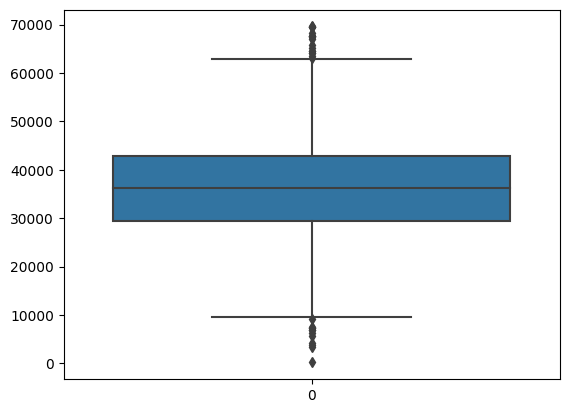

Price


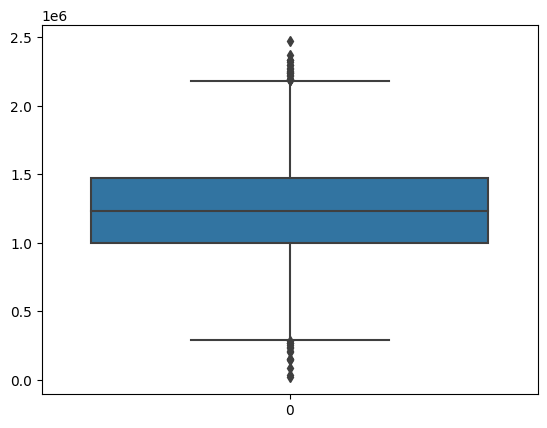

In [35]:
for i in df.columns:
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [36]:
# Removing the outliers using interquartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [37]:
df.shape


(4865, 6)

In [38]:
# Converting Avg. Area Number of Rooms and Avg. Area Number of Bedrooms into int

df["Avg. Area Number of Rooms"] = df["Avg. Area Number of Rooms"].astype(int)
df["Avg. Area Number of Bedrooms"] = df["Avg. Area Number of Bedrooms"].astype(int)

In [39]:
df['Avg. Area Number of Bedrooms'].unique()

array([4, 3, 5, 2, 6])

<Axes: >

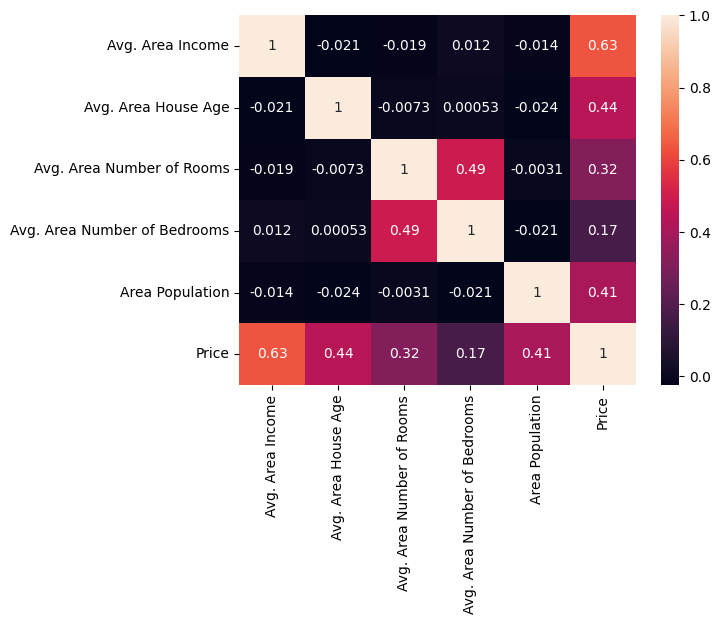

In [40]:
sns.heatmap(df.corr(), annot=True)

# Linear Regression Model Creation

In [41]:
# Importing the linear regression model

from sklearn.linear_model import Lasso

# Importing the preprocessing libraries

from sklearn.preprocessing import StandardScaler

# Importing the train_test_split library

from sklearn.model_selection import train_test_split

# Importing the metrics libraries

from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

In [42]:
# Getting columns having unique values greater than 10 in a list

coltoscale = [i for i in df.columns if len(
    df[i].unique()) > 10 and i != "Price"]


In [43]:
# Splitting the data into X and y
X = df.drop("Price", axis=1)
y = df[["Price"]]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)


"""# Scaling the data
sc = StandardScaler()
X_train[coltoscale] = sc.fit_transform(X_train[coltoscale])
X_test[coltoscale] = sc.transform(X_test[coltoscale])"""

'# Scaling the data\nsc = StandardScaler()\nX_train[coltoscale] = sc.fit_transform(X_train[coltoscale])\nX_test[coltoscale] = sc.transform(X_test[coltoscale])'

# First Model

Model for Avg. Area Income
Mean Absolute Error: 211716.76182599794
Mean Squared Error: 69468862513.88437
Root Mean Squared Error: 263569.46430473385
R2 Score: 0.4054556296102926



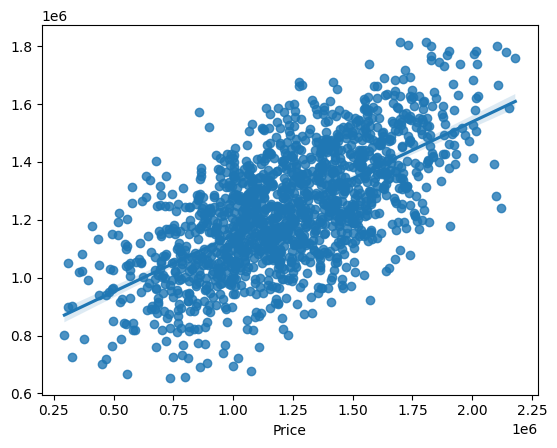



Model for Avg. Area House Age
Mean Absolute Error: 250258.9815698541
Mean Squared Error: 94851512861.23204
Root Mean Squared Error: 307979.7280036984
R2 Score: 0.18822000312267406



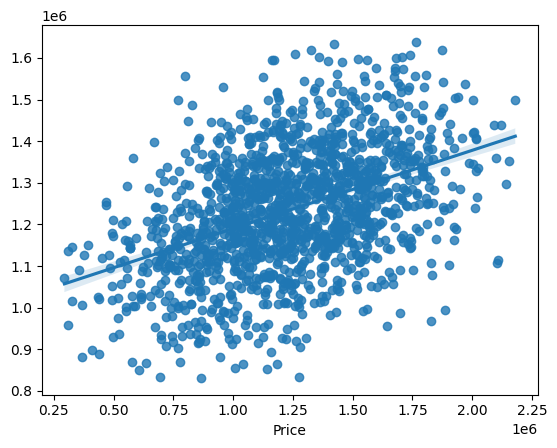



Model for Avg. Area Number of Rooms
Mean Absolute Error: 261615.10504909794
Mean Squared Error: 103672012173.35172
Root Mean Squared Error: 321981.38482426543
R2 Score: 0.11273038057417029



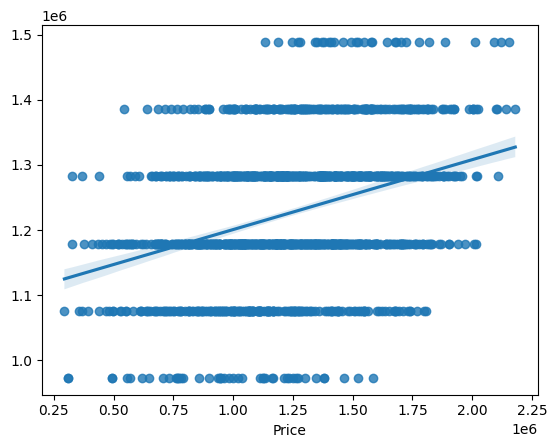



Model for Avg. Area Number of Bedrooms
Mean Absolute Error: 273926.30140223575
Mean Squared Error: 113559200398.1371
Root Mean Squared Error: 336985.460217703
R2 Score: 0.028111576043512



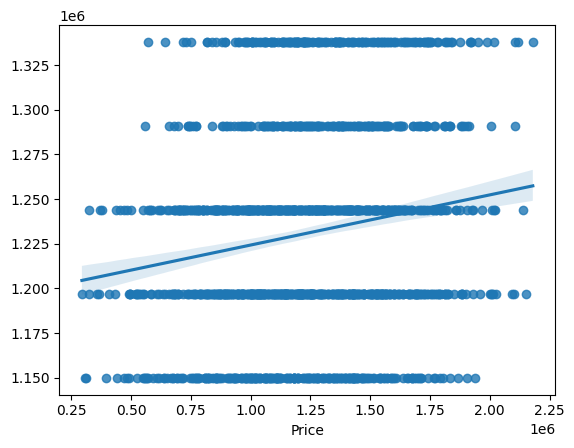



Model for Area Population
Mean Absolute Error: 250099.56364948204
Mean Squared Error: 97081911020.7435
Root Mean Squared Error: 311579.7025172588
R2 Score: 0.16913129745687938



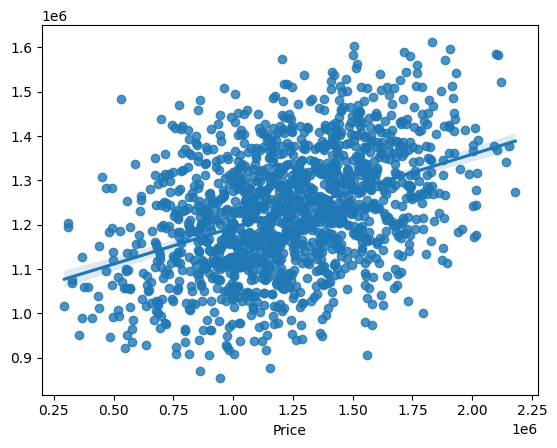

In [44]:
# Creating the model for every feature

for i in X.columns:
    model = Lasso()
    model.fit(X_train[[i]], y_train)
    y_pred = model.predict(X_test[[i]])
    print("Model for", i)
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("")
    sns.regplot(x=y_test, y=y_pred)
    plt.show()
    print("\n")

> ### We can see that Avg. Area Income is the best feature for our model.

# Creating the 2nd model for 3 best features

Model for 3 best features
Mean Absolute Error: 126038.20126139282
Mean Squared Error: 24921076520.521698
Root Mean Squared Error: 157864.10776526024
R2 Score: 0.786714720622265



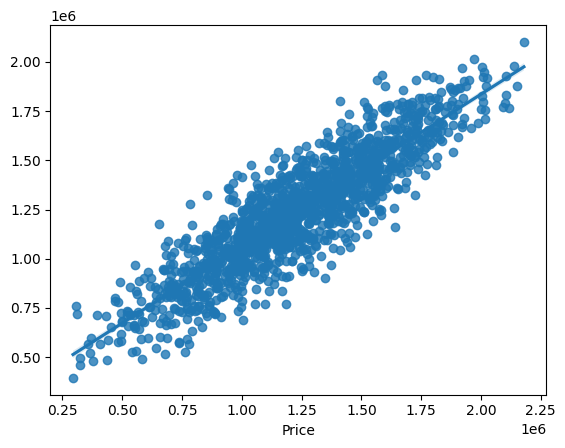

In [45]:
# Creating the model for with 3 best features (Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms)

model = Lasso()
model.fit(
    X_train[["Avg. Area Income", "Avg. Area House Age", "Area Population"]],
    y_train,
)
y_pred = model.predict(
    X_test[["Avg. Area Income", "Avg. Area House Age", "Area Population"]]
)

print("Model for 3 best features")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
print("")
sns.regplot(x=y_test, y=y_pred)
plt.show()

# Making 3rd model with 3 worst features

Model for 3 worst features
Mean Absolute Error: 230898.10173253683
Mean Squared Error: 83752544531.75313
Root Mean Squared Error: 289400.3188176425
R2 Score: 0.2832097423904859



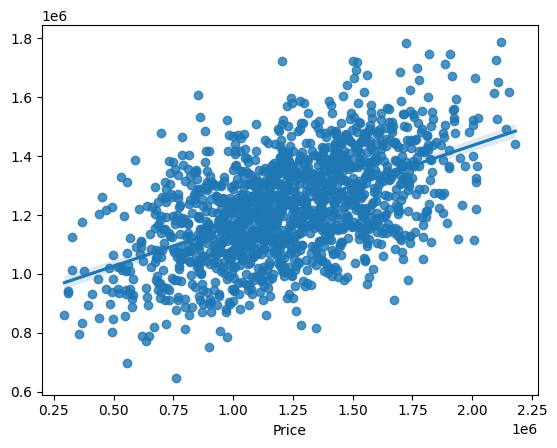

In [46]:
# Creating the model for with 3 worst features (Avg. Area Number of Bedrooms, Area Population, Avg. Area Number of Bedrooms)

model = Lasso()
model.fit(
    X_train[
        [
            "Avg. Area Number of Bedrooms",
            "Area Population",
            "Avg. Area Number of Rooms",
        ]
    ],
    y_train,
)
y_pred = model.predict(
    X_test[
        [
            "Avg. Area Number of Bedrooms",
            "Area Population",
            "Avg. Area Number of Rooms",
        ]
    ]
)

print("Model for 3 worst features")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
print("")
sns.regplot(x=y_test, y=y_pred)
plt.show()

# Making 4th model with all features

In [47]:
# Grid Search CV for Linear Regression

from sklearn.model_selection import GridSearchCV

# Creating the model

model = Lasso()

# Creating the grid search cv

params = {"alpha": [0.1, 0.01, 0.001, 0.0001, 0.00001]}

grid = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=1)

# Fitting the model

grid.fit(X_train, y_train)

# Printing the best parameters and accuracy

print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'alpha': 0.1}
0.9003987440700852
Lasso(alpha=0.1)


Model for all features
Mean Absolute Error: 86061.89439632073
Mean Squared Error: 11630419314.707148
Root Mean Squared Error: 107844.42180617015
R2 Score: 0.9054937625524723



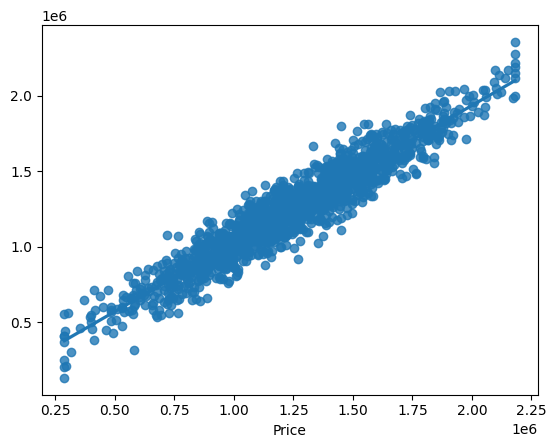

In [25]:
# Creating the model for with all features

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model for all features")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
print("")
sns.regplot(x=y_test, y=y_pred)
plt.show()

 ## We can see that the model with all features is the best model
- ### We can see that the model with all features is the best model and scaling had no effect on the model. 

df.to_csv(r'C:\Users\ds12\College\ML-Assignments\Data Sets\MLK\cleanusa.csv',index=False)